In [2]:
from solweig_gpu import thermal_comfort

In [3]:
thermal_comfort(
    base_path='/Users/geo-ns36752/Downloads/SOLWEIG-GPU 2/Input_rasters',
    selected_date_str='2020-08-13',
    building_dsm_filename='Building_DSM.tif',
    dem_filename='DEM.tif',
    trees_filename='Trees.tif',
    landcover_filename='Landcover.tif',
    tile_size=1000,
    overlap=100,
    use_own_met=False,
    start_time='2020-08-13 00:00:00',
    end_time='2020-08-14 23:00:00',
    data_source_type='ERA5',
    data_folder='/Users/geo-ns36752/Downloads/SOLWEIG-GPU 2/Forcing_data/ERA5',
    save_svf=True,
)

Creating tiles for Building_DSM...
Created tile: /Users/geo-ns36752/Downloads/SOLWEIG-GPU 2/Input_rasters/Building_DSM/Building_DSM_0_0.tif
Created tile: /Users/geo-ns36752/Downloads/SOLWEIG-GPU 2/Input_rasters/Building_DSM/Building_DSM_0_1000.tif
Created tile: /Users/geo-ns36752/Downloads/SOLWEIG-GPU 2/Input_rasters/Building_DSM/Building_DSM_0_2000.tif
Created tile: /Users/geo-ns36752/Downloads/SOLWEIG-GPU 2/Input_rasters/Building_DSM/Building_DSM_0_3000.tif
Created tile: /Users/geo-ns36752/Downloads/SOLWEIG-GPU 2/Input_rasters/Building_DSM/Building_DSM_1000_0.tif
Created tile: /Users/geo-ns36752/Downloads/SOLWEIG-GPU 2/Input_rasters/Building_DSM/Building_DSM_1000_1000.tif
Created tile: /Users/geo-ns36752/Downloads/SOLWEIG-GPU 2/Input_rasters/Building_DSM/Building_DSM_1000_2000.tif
Created tile: /Users/geo-ns36752/Downloads/SOLWEIG-GPU 2/Input_rasters/Building_DSM/Building_DSM_1000_3000.tif
Created tile: /Users/geo-ns36752/Downloads/SOLWEIG-GPU 2/Input_rasters/Building_DSM/Building_DS

Computing Wall Height and Aspect: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [01:42<00:00,  6.42s/it]


Running Solweig ...
Attention! The land cover grid includes values (deciduous and/or conifer) not appropriate for the SOLWEIG-formatted land cover grid (should not include 3 or 4). Land cover under the vegetation is required. Setting the invalid landcover types to grass.
[INFO] Timezone: America/Chicago, UTC offset: -5.0 hours
Time taken to execute tile 0_0: 911.22 seconds
Attention! The land cover grid includes values (deciduous and/or conifer) not appropriate for the SOLWEIG-formatted land cover grid (should not include 3 or 4). Land cover under the vegetation is required. Setting the invalid landcover types to grass.
[INFO] Timezone: America/Chicago, UTC offset: -5.0 hours
Time taken to execute tile 0_1000: 721.32 seconds
Attention! The land cover grid includes values (deciduous and/or conifer) not appropriate for the SOLWEIG-formatted land cover grid (should not include 3 or 4). Land cover under the vegetation is required. Setting the invalid landcover types to grass.
[INFO] Timezo

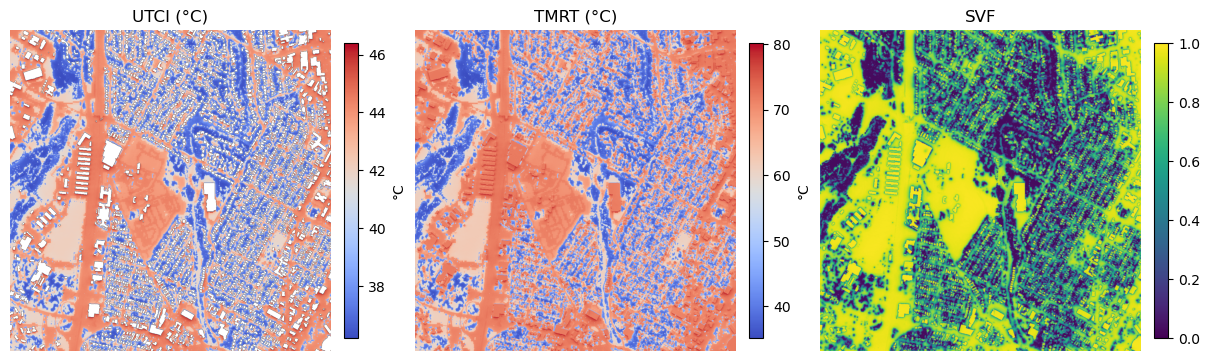

In [5]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# ---- paths ----
utci_path = "/Users/geo-ns36752/Downloads/SOLWEIG-GPU 2/Input_rasters/Outputs/0_2000/UTCI_0_2000.tif"
tmrt_path = "/Users/geo-ns36752/Downloads/SOLWEIG-GPU 2/Input_rasters/Outputs/0_2000/TMRT_0_2000.tif"
svf_path  = "/Users/geo-ns36752/Downloads/SOLWEIG-GPU 2/Input_rasters/Outputs/0_2000/SVF_0_2000.tif"

def read_band(path, preferred_band=15):
    """Read preferred_band if it exists; otherwise fall back to band 1 (useful for single-band rasters like SVF)."""
    with rasterio.open(path) as src:
        band = preferred_band if preferred_band <= src.count else 1
        arr = src.read(band).astype(float)
        # mask NoData
        if src.nodata is not None:
            arr = np.where(arr == src.nodata, np.nan, arr)
        bounds = src.bounds
        extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
    return arr, extent

# read rasters (UTCI/TMRT often have multiple time bands; SVF is single-band)
utci, utci_extent = read_band(utci_path, preferred_band=15)  # 15 = 3pm if bands are hourly starting at 1
tmrt, tmrt_extent = read_band(tmrt_path, preferred_band=15)
svf,  svf_extent  = read_band(svf_path,  preferred_band=1)   # force band 1 for SVF

# ---- colormaps / norms ----
utci_cmap = "coolwarm"
tmrt_cmap = "coolwarm"
svf_cmap  = "viridis" 

# ---- plot ----
fig, axes = plt.subplots(1, 3, figsize=(12, 5), constrained_layout=True)

im0 = axes[0].imshow(utci, extent=utci_extent, origin="upper",
                     cmap=utci_cmap)
axes[0].set_title("UTCI (°C)")
axes[0].axis("off")
cbar0 = fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)
cbar0.set_label("°C")

im1 = axes[1].imshow(tmrt, extent=tmrt_extent, origin="upper",
                     cmap=tmrt_cmap)
axes[1].set_title("TMRT (°C)")
axes[1].axis("off")
cbar1 = fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)
cbar1.set_label("°C")

im2 = axes[2].imshow(svf, extent=svf_extent, origin="upper",
                     cmap=svf_cmap, vmin=0, vmax=1)
axes[2].set_title("SVF")
axes[2].axis("off")
cbar2 = fig.colorbar(im2, ax=axes[2], fraction=0.046, pad=0.04)
cbar2.set_label("")

plt.show()